In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder , StandardScaler ,MinMaxScaler , Normalizer ,LabelEncoder
from sklearn.feature_selection import RFECV
import pickle

# Read Data

In [2]:
# Load Train set
train = pd.read_csv("train.csv")

# Load Test set
test = pd.read_csv("test.csv")

In [3]:
train = train.head(500)

In [4]:
test = test.head(500)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             500 non-null    int64  
 1   MSSubClass     500 non-null    int64  
 2   MSZoning       500 non-null    object 
 3   LotFrontage    413 non-null    float64
 4   LotArea        500 non-null    int64  
 5   Street         500 non-null    object 
 6   Alley          31 non-null     object 
 7   LotShape       500 non-null    object 
 8   LandContour    500 non-null    object 
 9   Utilities      500 non-null    object 
 10  LotConfig      500 non-null    object 
 11  LandSlope      500 non-null    object 
 12  Neighborhood   500 non-null    object 
 13  Condition1     500 non-null    object 
 14  Condition2     500 non-null    object 
 15  BldgType       500 non-null    object 
 16  HouseStyle     500 non-null    object 
 17  OverallQual    500 non-null    int64  
 18  OverallCon

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             500 non-null    int64  
 1   MSSubClass     500 non-null    int64  
 2   MSZoning       499 non-null    object 
 3   LotFrontage    421 non-null    float64
 4   LotArea        500 non-null    int64  
 5   Street         500 non-null    object 
 6   Alley          36 non-null     object 
 7   LotShape       500 non-null    object 
 8   LandContour    500 non-null    object 
 9   Utilities      498 non-null    object 
 10  LotConfig      500 non-null    object 
 11  LandSlope      500 non-null    object 
 12  Neighborhood   500 non-null    object 
 13  Condition1     500 non-null    object 
 14  Condition2     500 non-null    object 
 15  BldgType       500 non-null    object 
 16  HouseStyle     500 non-null    object 
 17  OverallQual    500 non-null    int64  
 18  OverallCon

In [7]:
def counting_nanvalues(data_frame,element):
    print('Number of NaN Values: -')
    print(data_frame.isna().sum().sort_values(ascending=False)[:element])
    print('--------------------------------------------------------')
    print('NaN Percentage: -')
    print((data_frame.isna().sum().sort_values(ascending=False)\
           [:element])/data_frame.shape[0])
    print('--------------------------------------------------------')

In [8]:
# Show Train Nan
counting_nanvalues(train,20)

Number of NaN Values: -
PoolQC          499
MiscFeature     481
Alley           469
Fence           401
FireplaceQu     233
LotFrontage      87
GarageYrBlt      29
GarageFinish     29
GarageType       29
GarageQual       29
GarageCond       29
BsmtFinType2     12
BsmtExposure     11
BsmtQual         11
BsmtCond         11
BsmtFinType1     11
MasVnrType        1
MasVnrArea        1
Id                0
Functional        0
dtype: int64
--------------------------------------------------------
NaN Percentage: -
PoolQC          0.998
MiscFeature     0.962
Alley           0.938
Fence           0.802
FireplaceQu     0.466
LotFrontage     0.174
GarageYrBlt     0.058
GarageFinish    0.058
GarageType      0.058
GarageQual      0.058
GarageCond      0.058
BsmtFinType2    0.024
BsmtExposure    0.022
BsmtQual        0.022
BsmtCond        0.022
BsmtFinType1    0.022
MasVnrType      0.002
MasVnrArea      0.002
Id              0.000
Functional      0.000
dtype: float64
---------------------------------

In [9]:
# Show Test Nan
counting_nanvalues(test,20)

Number of NaN Values: -
PoolQC          500
MiscFeature     481
Alley           464
Fence           395
FireplaceQu     238
LotFrontage      79
GarageYrBlt      26
GarageType       26
GarageQual       26
GarageFinish     26
GarageCond       26
BsmtExposure     13
BsmtQual         12
BsmtCond         12
BsmtFinType2     12
BsmtFinType1     12
MasVnrArea        3
MasVnrType        3
Utilities         2
MSZoning          1
dtype: int64
--------------------------------------------------------
NaN Percentage: -
PoolQC          1.000
MiscFeature     0.962
Alley           0.928
Fence           0.790
FireplaceQu     0.476
LotFrontage     0.158
GarageYrBlt     0.052
GarageType      0.052
GarageQual      0.052
GarageFinish    0.052
GarageCond      0.052
BsmtExposure    0.026
BsmtQual        0.024
BsmtCond        0.024
BsmtFinType2    0.024
BsmtFinType1    0.024
MasVnrArea      0.006
MasVnrType      0.006
Utilities       0.004
MSZoning        0.002
dtype: float64
---------------------------------

In [10]:
def drop_columns(data_frame,columns):
    data_frame = data_frame.drop(columns,axis=1)
    data_frame = data_frame.reset_index(drop=True)
    return data_frame

In [11]:
def nan_columns(data_frame,percentage):
    names = [i for i in data_frame.columns if data_frame[i].isnull()\
     .sum() > percentage*len(data_frame)]
    return names

In [12]:
# Get Columns Name With Nan Value more Than 0.10%  
train_nan_columns =  nan_columns(train,.10)
test_nan_columns  =  nan_columns(test,.10)

In [13]:
# Drop Columns In Train and Test Data
train = drop_columns(train,train_nan_columns)
test = drop_columns(test,test_nan_columns)

In [14]:
# Show Train Nan
counting_nanvalues(train,20)

Number of NaN Values: -
GarageType      29
GarageYrBlt     29
GarageFinish    29
GarageQual      29
GarageCond      29
BsmtFinType2    12
BsmtFinType1    11
BsmtQual        11
BsmtCond        11
BsmtExposure    11
MasVnrType       1
MasVnrArea       1
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
KitchenAbvGr     0
KitchenQual      0
GrLivArea        0
dtype: int64
--------------------------------------------------------
NaN Percentage: -
GarageType      0.058
GarageYrBlt     0.058
GarageFinish    0.058
GarageQual      0.058
GarageCond      0.058
BsmtFinType2    0.024
BsmtFinType1    0.022
BsmtQual        0.022
BsmtCond        0.022
BsmtExposure    0.022
MasVnrType      0.002
MasVnrArea      0.002
BedroomAbvGr    0.000
HalfBath        0.000
FullBath        0.000
BsmtHalfBath    0.000
BsmtFullBath    0.000
KitchenAbvGr    0.000
KitchenQual     0.000
GrLivArea       0.000
dtype: float64
-----------------------------------------------------

In [15]:
counting_nanvalues(test,20)

Number of NaN Values: -
GarageYrBlt     26
GarageType      26
GarageFinish    26
GarageQual      26
GarageCond      26
BsmtExposure    13
BsmtFinType2    12
BsmtQual        12
BsmtCond        12
BsmtFinType1    12
MasVnrArea       3
MasVnrType       3
Utilities        2
KitchenQual      1
MSZoning         1
BedroomAbvGr     0
KitchenAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
dtype: int64
--------------------------------------------------------
NaN Percentage: -
GarageYrBlt     0.052
GarageType      0.052
GarageFinish    0.052
GarageQual      0.052
GarageCond      0.052
BsmtExposure    0.026
BsmtFinType2    0.024
BsmtQual        0.024
BsmtCond        0.024
BsmtFinType1    0.024
MasVnrArea      0.006
MasVnrType      0.006
Utilities       0.004
KitchenQual     0.002
MSZoning        0.002
BedroomAbvGr    0.000
KitchenAbvGr    0.000
HalfBath        0.000
FullBath        0.000
BsmtHalfBath    0.000
dtype: float64
-----------------------------------------------------

In [16]:
# Get List OF Null Columns In Train
train_nan_columns = nan_columns(train,0.0)

In [17]:
# Get List OF Null Columns In Test
test_nan_columns = nan_columns(test,0.0)

In [18]:
x=train[train_nan_columns]

In [19]:
print('Number of NAN columns IN Train : ', len(train_nan_columns))
print('Number of NAN columns IN Test  : ',len(test_nan_columns))

Number of NAN columns IN Train :  12
Number of NAN columns IN Test  :  15


###  We See That We have more nan columns in test set

## Categorical NaN Data

In [20]:
# Show Nan Columns In Train Data
train[train_nan_columns]

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,Attchd,2003.0,RFn,TA,TA
1,None,0.0,Gd,TA,Gd,ALQ,Unf,Attchd,1976.0,RFn,TA,TA
2,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,Attchd,2001.0,RFn,TA,TA
3,None,0.0,TA,Gd,No,ALQ,Unf,Detchd,1998.0,Unf,TA,TA
4,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...
495,None,0.0,TA,TA,No,Rec,Unf,NaN,NaN,NaN,NaN,NaN
496,None,0.0,Gd,TA,No,GLQ,Unf,Attchd,1992.0,RFn,TA,TA
497,None,0.0,TA,TA,No,Rec,Unf,Detchd,1925.0,Unf,TA,TA
498,BrkFace,89.0,TA,TA,No,ALQ,Unf,Attchd,1967.0,Fin,TA,TA


In [21]:
nan_with_mode =['GarageType','GarageCond','GarageFinish', 'GarageQual','BsmtFinType2',	'BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical']

In [22]:
# Get The Mode Of each Cat Column 
nan_col_mode = train.filter(nan_with_mode).mode()
nan_col_mode

,GarageType,GarageCond,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,Electrical
0,Attchd,TA,Unf,TA,Unf,No,GLQ,TA,TA,None,SBrkr
1,NaN,NaN,NaN,NaN,NaN,NaN,Unf,NaN,NaN,NaN,NaN


In [23]:
# Replacing Null values
train[nan_with_mode] = train[nan_with_mode].fillna(value = nan_col_mode.iloc[0])
test[nan_with_mode] = test[nan_with_mode].fillna(value = nan_col_mode.iloc[0])

In [24]:
counting_nanvalues(train,5)

Number of NaN Values: -
GarageYrBlt    29
MasVnrArea      1
HalfBath        0
Fireplaces      0
Functional      0
dtype: int64
--------------------------------------------------------
NaN Percentage: -
GarageYrBlt    0.058
MasVnrArea     0.002
HalfBath       0.000
Fireplaces     0.000
Functional     0.000
dtype: float64
--------------------------------------------------------


In [25]:
counting_nanvalues(test,10)

Number of NaN Values: -
GarageYrBlt     26
MasVnrArea       3
Utilities        2
MSZoning         1
KitchenQual      1
Id               0
BedroomAbvGr     0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
dtype: int64
--------------------------------------------------------
NaN Percentage: -
GarageYrBlt     0.052
MasVnrArea      0.006
Utilities       0.004
MSZoning        0.002
KitchenQual     0.002
Id              0.000
BedroomAbvGr    0.000
Fireplaces      0.000
Functional      0.000
TotRmsAbvGrd    0.000
dtype: float64
--------------------------------------------------------


In [26]:
# Numeric Null Columns In Train
numeric_nan =['GarageYrBlt']
train[numeric_nan]

,GarageYrBlt
0,2003.0
1,1976.0
2,2001.0
3,1998.0
4,2000.0
...,...
495,NaN
496,1992.0
497,1925.0
498,1967.0


C:\Users\17788\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


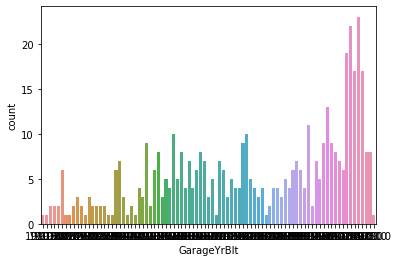

In [27]:
sns.countplot(train['GarageYrBlt']);

In [28]:
print('Unique Years in GarageYrBlt :\n')
print(train['GarageYrBlt'].unique(),'\n')
print('Number Of Years : ',len(train['GarageYrBlt'].unique()))
print('Oldest Year : ',train['GarageYrBlt'].min())
print('Newest Year : ',train['GarageYrBlt'].max())

Unique Years in GarageYrBlt :

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938.] 

Number Of Years :  88
Oldest Year :  1900.0
Newest Year :  2010.0


In [29]:
print('Number of NaN values in GarageYrBlt : ',train['GarageYrBlt'].isna().sum())
print('column data type :' ,train['GarageYrBlt'].dtype)

Number of NaN values in GarageYrBlt :  29
column data type : float64


In [30]:
def categoticalcolumn(c):
    
    #Function to create the new column using to set categorical Values 
    if c<1950:
        return "1900\'s "
    elif c>1950 and c<2000 :
        return '1950\'s'
    else:
        return '2000\'s'

In [31]:
# Creating New Categorical Column based on GarageYrBlt column 
train['CAT_GarageYrBlt'] = train['GarageYrBlt'].apply(categoticalcolumn)

C:\Users\17788\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

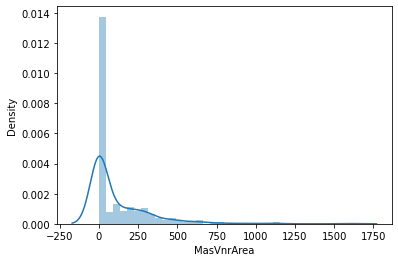

In [32]:
sns.distplot(train['MasVnrArea'])

In [33]:
# Counting the number of null values
test[['GarageYrBlt','MasVnrArea']].isna().sum()

GarageYrBlt    26
MasVnrArea      3
dtype: int64

In [34]:
# Training Data
train.fillna({'GarageYrBlt':train['GarageYrBlt'].median(),\
              'MasVnrArea':train['MasVnrArea'].mode()\
              },inplace=True)

# Test
test.fillna({'GarageYrBlt':test['GarageYrBlt'].median(),\
              'MasVnrArea':test['MasVnrArea'].mode()\
              },inplace=True)

In [35]:
counting_nanvalues(train,5)


Number of NaN Values: -
MasVnrArea      1
Id              0
BedroomAbvGr    0
GarageType      0
Fireplaces      0
dtype: int64
--------------------------------------------------------
NaN Percentage: -
MasVnrArea      0.002
Id              0.000
BedroomAbvGr    0.000
GarageType      0.000
Fireplaces      0.000
dtype: float64
--------------------------------------------------------


In [36]:
counting_nanvalues(test,20)

Number of NaN Values: -
MasVnrArea      3
Utilities       2
MSZoning        1
KitchenQual     1
Id              0
HalfBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
GarageYrBlt     0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageType      0
dtype: int64
--------------------------------------------------------
NaN Percentage: -
MasVnrArea      0.006
Utilities       0.004
MSZoning        0.002
KitchenQual     0.002
Id              0.000
HalfBath        0.000
Fireplaces      0.000
Functional      0.000
TotRmsAbvGrd    0.000
KitchenAbvGr    0.000
BedroomAbvGr    0.000
FullBath        0.000
GarageYrBlt     0.000
BsmtHalfBath    0.000
BsmtFullBath    0.000
GrLivArea       0.000
LowQualFinSF    0.000
2ndFlrSF        0.000
1stFlrSF        0.000
GarageType      0.000
dtype: float64
--------------------------------------------------------


In [37]:
# Drop Null values in Train
train = train.dropna().reset_index(drop=True)

In [38]:
# Drop NullValues in Test
test = test.dropna().reset_index(drop=True)

In [39]:
counting_nanvalues(train,5)

Number of NaN Values: -
Id            0
HalfBath      0
GarageType    0
Fireplaces    0
Functional    0
dtype: int64
--------------------------------------------------------
NaN Percentage: -
Id            0.0
HalfBath      0.0
GarageType    0.0
Fireplaces    0.0
Functional    0.0
dtype: float64
--------------------------------------------------------


In [40]:
counting_nanvalues(test,5)

Number of NaN Values: -
Id              0
GarageType      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
dtype: int64
--------------------------------------------------------
NaN Percentage: -
Id              0.0
GarageType      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
dtype: float64
--------------------------------------------------------


In [41]:
train_cols = train.columns

# Label Encoding

In [42]:
def column_cat(data_frame):
    length = [i for i,j in enumerate(data_frame.dtypes)\
              if j =='object']
    print('Number of Cat Columns : ',len(length))
    # Column name (CAT)
    if len(length) == 0 :
         return 'No Categorical Columns' , length
    else:
        cat_cols_names = data_frame.columns[length]
        return cat_cols_names , length
    
def Encode_CC(Data_frame):
    
    # Categorical Column Index
    cat_cols_names , length = column_cat(Data_frame)
    
    if len(length) > 0  :
        # Encode All Categorical Columns To Numbers
        label = LabelEncoder()
        for i in cat_cols_names:
            Data_frame[i] = label.fit_transform(Data_frame[i])

        return Data_frame
        
    else:
        print(cat_cols_names)
        return 
        

In [43]:
train = Encode_CC(train)

Number of Cat Columns :  39


In [44]:
train.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CAT_GarageYrBlt
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,2,2008,7,4,208500,2
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,5,2007,7,4,181500,1
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,9,2008,7,4,223500,2
3,4,70,3,9550,1,0,3,0,0,0,...,0,0,0,0,2,2006,7,0,140000,1
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,12,2008,7,4,250000,2


In [45]:
test = Encode_CC(test)

Number of Cat Columns :  38


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               499 non-null    int64  
 1   MSSubClass       499 non-null    int64  
 2   MSZoning         499 non-null    int32  
 3   LotArea          499 non-null    int64  
 4   Street           499 non-null    int32  
 5   LotShape         499 non-null    int32  
 6   LandContour      499 non-null    int32  
 7   Utilities        499 non-null    int32  
 8   LotConfig        499 non-null    int32  
 9   LandSlope        499 non-null    int32  
 10  Neighborhood     499 non-null    int32  
 11  Condition1       499 non-null    int32  
 12  Condition2       499 non-null    int32  
 13  BldgType         499 non-null    int32  
 14  HouseStyle       499 non-null    int32  
 15  OverallQual      499 non-null    int64  
 16  OverallCond      499 non-null    int64  
 17  YearBuilt       

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             494 non-null    int64  
 1   MSSubClass     494 non-null    int64  
 2   MSZoning       494 non-null    int32  
 3   LotArea        494 non-null    int64  
 4   Street         494 non-null    int32  
 5   LotShape       494 non-null    int32  
 6   LandContour    494 non-null    int32  
 7   Utilities      494 non-null    int32  
 8   LotConfig      494 non-null    int32  
 9   LandSlope      494 non-null    int32  
 10  Neighborhood   494 non-null    int32  
 11  Condition1     494 non-null    int32  
 12  Condition2     494 non-null    int32  
 13  BldgType       494 non-null    int32  
 14  HouseStyle     494 non-null    int32  
 15  OverallQual    494 non-null    int64  
 16  OverallCond    494 non-null    int64  
 17  YearBuilt      494 non-null    int64  
 18  YearRemodA

C:\Users\17788\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

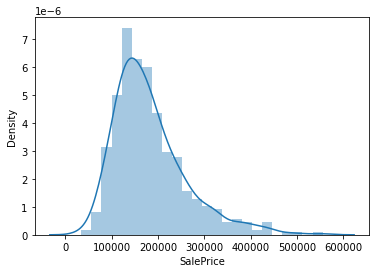

In [48]:
sns.distplot(train['SalePrice'])

C:\Users\17788\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

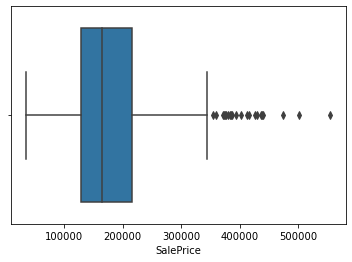

In [49]:
sns.boxplot(train['SalePrice'])

In [50]:
def outlier_i(data_frame):
    '''
    Function to get outlier index according to IQR in one Column
    input : which Returns List OF Index of Outlier in column
    
   
    
    '''
    Q1 = data_frame.quantile(.25)
    Q2 = data_frame.quantile(.50)
    Q3 = data_frame.quantile(.75)
    iqr = Q3-Q1
    print('IQR IS : ',iqr)
    min = Q1- 1.5*iqr
    max = Q3 +1.5 *iqr
    print('min : ',min)
    print('max : ',max)
    j= 0
    index = []
    for i in data_frame.index:
        if (data_frame[i]   < min ) or (data_frame[i]  > max ):
            index.append(i)
    return index

In [51]:
def model_training(model):
    # Split The Data
    y = train['SalePrice'].copy()
    x = train.drop('SalePrice',axis=1).copy()
    x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.20,random_state=42)

    # Train the model
    model.fit(x_train,y_train)

    # TEST The model
    y_pred = model.predict(x_test)
    print('{} accuracy is :'.format(model),r2_score(y_test,y_pred))

    plt.figure()
    plt.title("Actual vs. Predicted house prices\n", fontsize=20)
    plt.scatter(y_test,y_pred,color="deepskyblue", marker="o", facecolors="none")
    plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
    plt.xlabel("\nActual Price", fontsize=16)
    plt.ylabel("Predicted Price\n", fontsize=16)
    plt.show()
    del y_pred
    return model

In [52]:
def fp(model,scaler):
    # Split The Data
    y = train['SalePrice'].copy()
    x = train.drop('SalePrice',axis=1).copy()
    x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.20,random_state=42)

    # Create Pipe Line
    pipe_line = Pipeline([('scaler',scaler),('model',model)])

    # Train & Test PIPELINE
    pipe_line.fit(x_train,y_train)
    y_pred = pipe_line.predict(x_test)

    # Evaluate Model
    print('{} and {} accuracy is : '.format(model,scaler),r2_score(y_test,y_pred))
    
    plt.figure()
    plt.title("Actual vs. Predicted house prices\n", fontsize=20)
    plt.scatter(y_test,y_pred,color="deepskyblue", marker="o", facecolors="none")
    plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
    plt.xlabel("\nActual Price", fontsize=16)
    plt.ylabel("Predicted Price\n", fontsize=16)
    plt.show()
    
    del y_pred 
    return pipe_line

In [53]:
def column_selection(model,scaler):
    # Split The Data
    y = train['SalePrice'].copy()
    x = train.drop('SalePrice',axis=1).copy()
    # Feature Selection
    rf =RFECV(model,cv=3)
    rf.fit(x,y)
    # Get BEst feature Name to The Model
    cols = x.columns[rf.support_]

    ## Select Columns And Split Data 
    x = train[cols]
    x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.20,random_state=42)

    # Create Pipe Line
    pipe_line = Pipeline([('scaler',scaler),('model',model)])

    # Train & Test PIPELINE
    pipe_line.fit(x_train,y_train)
    y_pred = pipe_line.predict(x_test)

    # Evaluate Model
    print('After Feature Selection')
    print('{} and {} accuracy is : '.format(model,scaler),r2_score(y_test,y_pred))
    
    plt.figure()
    plt.title("Actual vs. Predicted house prices\n", fontsize=20)
    plt.scatter(y_test,y_pred,color="deepskyblue", marker="o", facecolors="none")
    plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
    plt.xlabel("\nActual Price", fontsize=16)
    plt.ylabel("Predicted Price\n", fontsize=16)
    plt.show()
    
    del y_pred ,x ,y ,x_train,x_test,y_train,y_test
    return pipe_line , cols

# Linear

LinearRegression() accuracy is : 0.8726993986082975


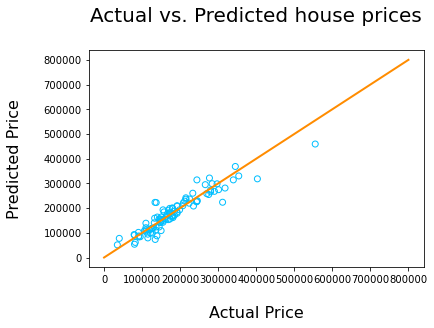

LinearRegression()

In [54]:
# Create The Model
model =LinearRegression()

# Train The model
model_training(model)

LinearRegression() and StandardScaler() accuracy is :  0.8726885877915808


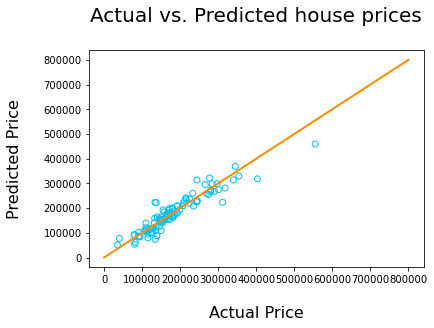

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [55]:
# Create Model
model =LinearRegression()

# Create Scaler
scaler = StandardScaler()

# Train The Model
fp(model,scaler)

LinearRegression() and MinMaxScaler() accuracy is :  0.8728220151961307


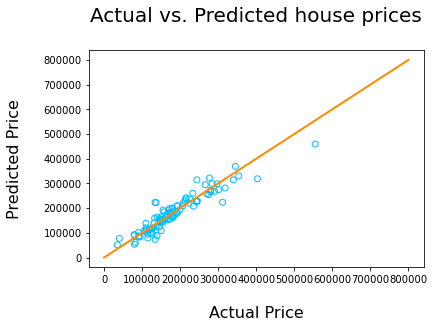

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [56]:
# Create Model
model =LinearRegression()

# Create Scaler
scaler = MinMaxScaler()

# Train The Model
fp(model,scaler)

LinearRegression() and Normalizer() accuracy is :  0.7641470593524851


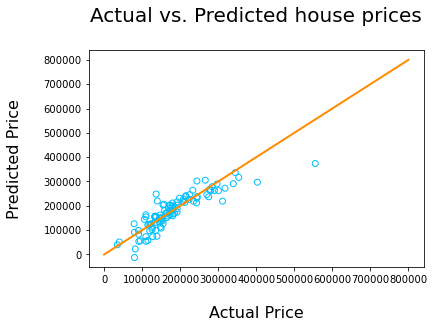

Pipeline(steps=[('scaler', Normalizer()), ('model', LinearRegression())])

In [57]:
# Create Model
model =LinearRegression()

# Create Scaler
scaler = Normalizer()


# Train The Model
fp(model,scaler)

# RandomForestRegressor

RandomForestRegressor() accuracy is : 0.8249069555654178


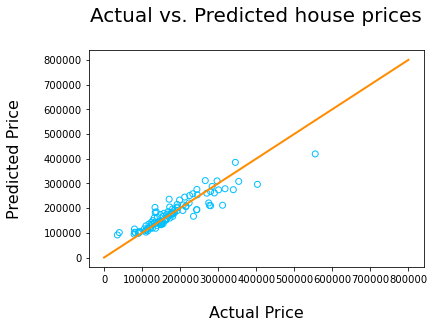

RandomForestRegressor()

In [58]:
# Create the Model
model =RandomForestRegressor()

# Train The Model
model_training(model)

RandomForestRegressor() and StandardScaler() accuracy is :  0.8400068693890166


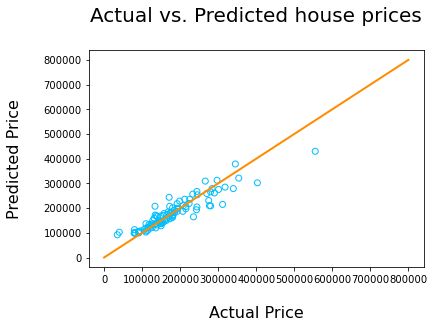

After Feature Selection
RandomForestRegressor() and StandardScaler() accuracy is :  0.8397574531245986


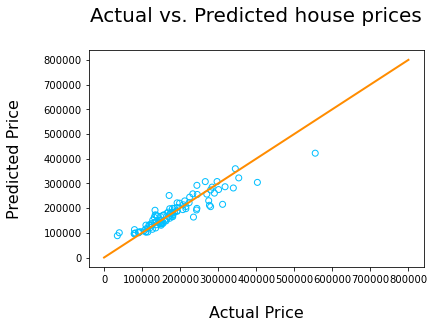

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', RandomForestRegressor())]),
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
        'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'Garag

In [59]:
# Create Model
model =RandomForestRegressor()

# Create Scaler
scaler = StandardScaler()

# Train the model without feature selection
fp(model,scaler)

# Train The Model With Feature Selection
column_selection(model,scaler)

RandomForestRegressor() and MinMaxScaler() accuracy is :  0.8380975366467265


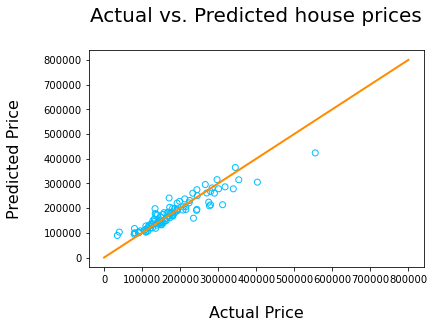

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', RandomForestRegressor())])

In [60]:
# Create Model
model =RandomForestRegressor()

# Create Scaler
scaler = MinMaxScaler()


# Train the Model
fp(model,scaler)

RandomForestRegressor() and Normalizer() accuracy is :  0.8178602107363527


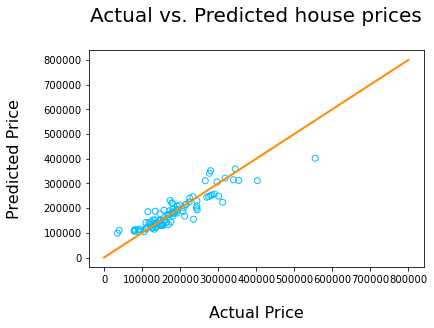

Pipeline(steps=[('scaler', Normalizer()), ('model', RandomForestRegressor())])

In [61]:
# Create Model
model =RandomForestRegressor()

# Create Scaler
scaler = Normalizer()


# Train the Model
fp(model,scaler)

# AdaBoostRegressor

AdaBoostRegressor() accuracy is : 0.8146807810089092


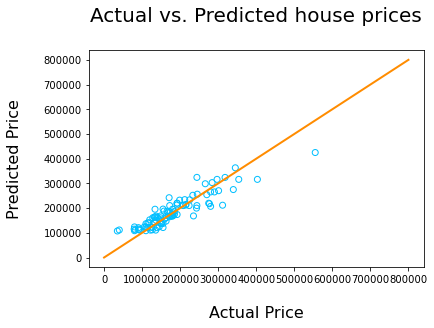

AdaBoostRegressor()

In [62]:
# Create The Model
model = AdaBoostRegressor()

# Train the Model
model_training(model)

AdaBoostRegressor() and StandardScaler() accuracy is :  0.8160428937834665


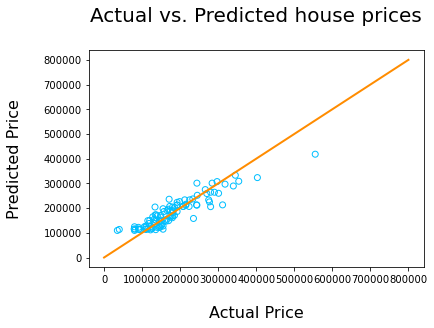

Pipeline(steps=[('scaler', StandardScaler()), ('model', AdaBoostRegressor())])

In [63]:
# Create Model
model = AdaBoostRegressor()

# Create Scaler
scaler = StandardScaler()


# Train the Model
fp(model,scaler)

AdaBoostRegressor() and MinMaxScaler() accuracy is :  0.8303729294119897


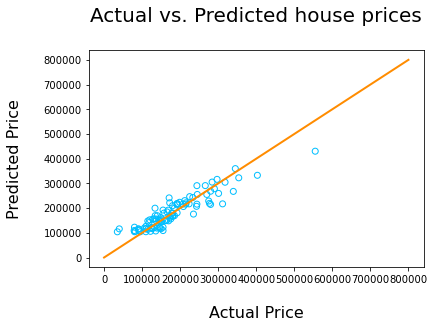

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', AdaBoostRegressor())])

In [64]:
# Create Model
model = AdaBoostRegressor()

# Create Scaler
scaler = MinMaxScaler()


# Train the Model
fp(model,scaler)

AdaBoostRegressor() and Normalizer() accuracy is :  0.7804609688058044


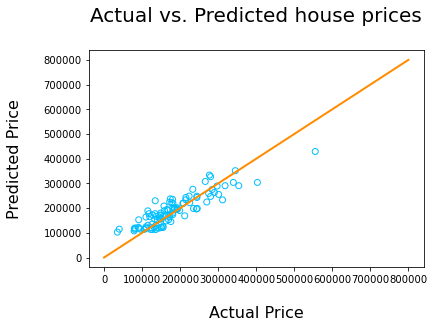

Pipeline(steps=[('scaler', Normalizer()), ('model', AdaBoostRegressor())])

In [65]:
# Create Model
model = AdaBoostRegressor()

# Create Scaler
scaler = Normalizer()


# Train the Model
fp(model,scaler)

# GradientBoostingRegressor

GradientBoostingRegressor() accuracy is : 0.8595416128203135


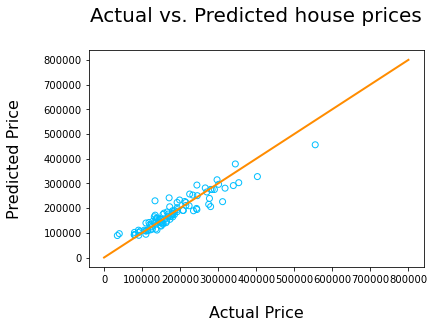

In [66]:
# Create Model
model =GradientBoostingRegressor()

# Train the Model
model = model_training(model)

## GradientBoostingRegressor is BEST accuracy  0.86

GradientBoostingRegressor() and MinMaxScaler() accuracy is :  0.8606913774773435


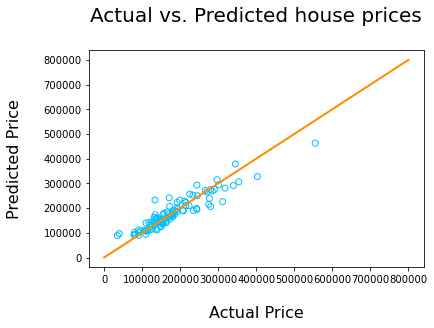

After Feature Selection
GradientBoostingRegressor() and MinMaxScaler() accuracy is :  0.8645890633827342


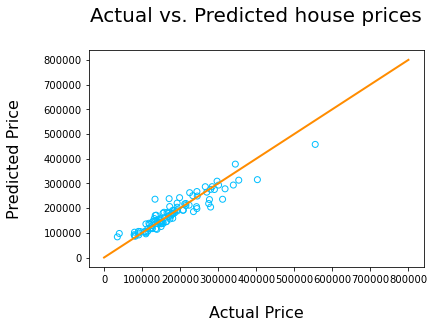

(Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('model', GradientBoostingRegressor())]),
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
        'LandSlope', 'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
        'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
        'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
        'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleCondition'],
       dtype='object'))

In [67]:
# Create Model
model =GradientBoostingRegressor()

# Create Scaler
scaler = MinMaxScaler()


# Train the model
fp(model,scaler)


# Train the model with best feature
column_selection(model,scaler)

# GaussianNB


GaussianNB() accuracy is : 0.3869623091317417


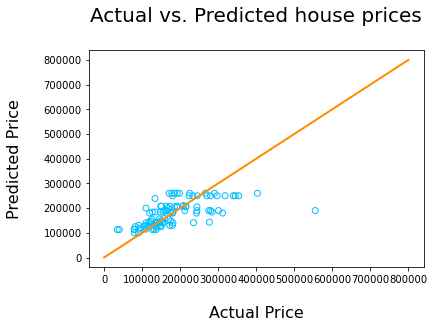

GaussianNB()

In [69]:
# Create Model
model =GaussianNB()

# Train the model
model_training(model)

GaussianNB() and StandardScaler() accuracy is :  0.20581449451428369


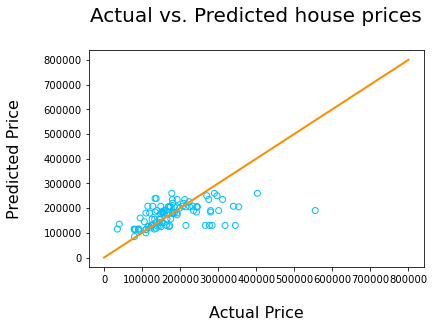

Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())])

In [70]:
# Create Model
model =GaussianNB()

# Create Scaler
scaler = StandardScaler()

# Train Model
fp(model,scaler)

GaussianNB() and MinMaxScaler() accuracy is :  0.09370253245705906


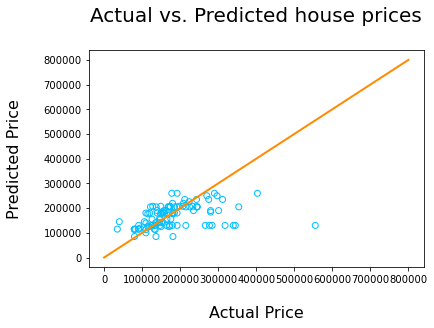

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', GaussianNB())])

In [71]:
# Create Model
model =GaussianNB()

# Create Scaler
scaler = MinMaxScaler()

# Train Model
fp(model,scaler)

GaussianNB() and Normalizer() accuracy is :  0.303449814791488


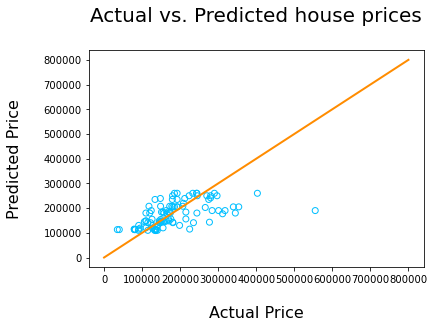

Pipeline(steps=[('scaler', Normalizer()), ('model', GaussianNB())])

In [72]:
# Create Model
model =GaussianNB()

# Create Scaler
scaler = Normalizer()

# Train Model
fp(model,scaler)

# KNeighborsRegressor

KNeighborsRegressor() accuracy is : 0.6141556493120479


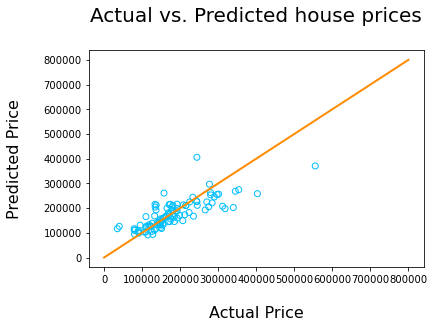

KNeighborsRegressor()

In [73]:
#Create the Model
model = KNeighborsRegressor()

# Train The Model
model_training(model)

KNeighborsRegressor() and StandardScaler() accuracy is :  0.752954890320717


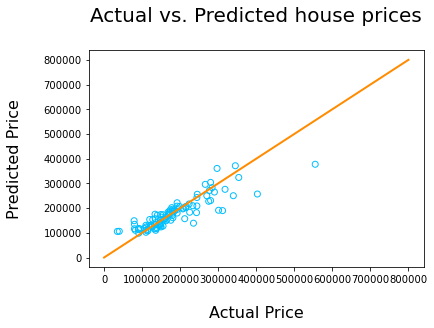

Pipeline(steps=[('scaler', StandardScaler()), ('model', KNeighborsRegressor())])

In [74]:
# Create Model
model = KNeighborsRegressor()

# Create Scaler
scaler = StandardScaler()

# Train Model
fp(model,scaler)

KNeighborsRegressor() and MinMaxScaler() accuracy is :  0.7142144294533772


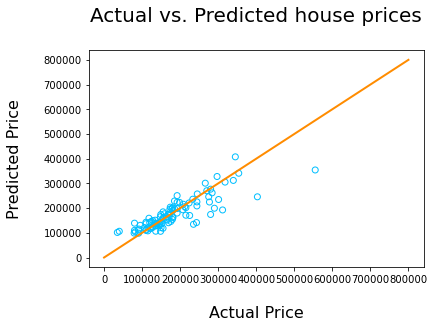

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', KNeighborsRegressor())])

In [75]:
# Create Model
model = KNeighborsRegressor()

# Create Scaler
scaler = MinMaxScaler()

# Train Model
fp(model,scaler)

KNeighborsRegressor() and Normalizer() accuracy is :  0.6820825067767126


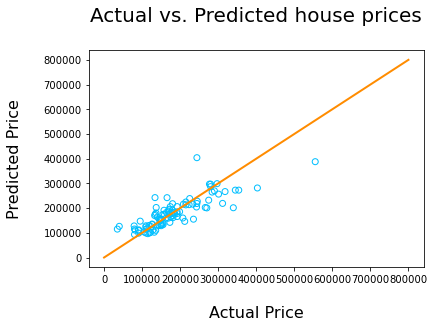

Pipeline(steps=[('scaler', Normalizer()), ('model', KNeighborsRegressor())])

In [76]:
# Create Model
model = KNeighborsRegressor()

# Create Scaler
scaler = Normalizer()

# Train Model
fp(model,scaler)

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             494 non-null    int64  
 1   MSSubClass     494 non-null    int64  
 2   MSZoning       494 non-null    int32  
 3   LotArea        494 non-null    int64  
 4   Street         494 non-null    int32  
 5   LotShape       494 non-null    int32  
 6   LandContour    494 non-null    int32  
 7   Utilities      494 non-null    int32  
 8   LotConfig      494 non-null    int32  
 9   LandSlope      494 non-null    int32  
 10  Neighborhood   494 non-null    int32  
 11  Condition1     494 non-null    int32  
 12  Condition2     494 non-null    int32  
 13  BldgType       494 non-null    int32  
 14  HouseStyle     494 non-null    int32  
 15  OverallQual    494 non-null    int64  
 16  OverallCond    494 non-null    int64  
 17  YearBuilt      494 non-null    int64  
 18  YearRemodA